In [87]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [88]:
dataset=pd.read_csv('titanic.csv')
dataset.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


# DATA PREPROCESSING

## 1.MISSING DATA

In [90]:
dataset.isnull().sum()

Pclass        0
Gender        0
Age         263
SibSp         0
ParCh         0
Fare          1
Embarked      2
Status        0
dtype: int64

In [91]:
dataset.isnull().sum()/len(dataset)*100

Pclass       0.000000
Gender       0.000000
Age         20.091673
SibSp        0.000000
ParCh        0.000000
Fare         0.076394
Embarked     0.152788
Status       0.000000
dtype: float64

<AxesSubplot:ylabel='Age'>

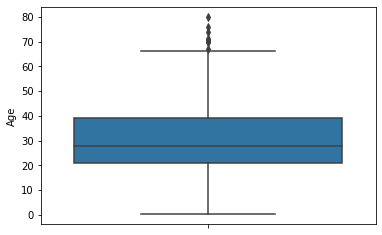

In [92]:
#No feature have missing data greater than 25% so we can not drop any feature 
#We have to impute values

#AGE
sns.boxplot(y="Age",data=dataset)

In [93]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

<AxesSubplot:ylabel='Fare'>

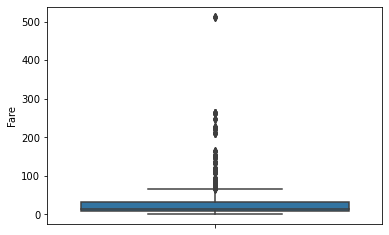

In [94]:
#FARE 
sns.boxplot(y="Fare",data=dataset)


In [95]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [96]:
m= dataset["Embarked"].tolist()
M= st.mode(m)
print(M)
dataset["Embarked"]= dataset["Embarked"].fillna('Southampton')

ModeResult(mode=array(['Southampton'], dtype='<U32'), count=array([914]))


In [97]:
dataset.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
ParCh       0
Fare        0
Embarked    0
Status      0
dtype: int64

## 2. OUTLIER HANDLING


In [98]:
#NO NEED TO HANDLE OUTLIER AS THIS IS CLASSIFICATION PROBLEM STATEMENT.

## 3.FEATURE SCALING 

In [99]:
#NO FEATURE SCALING IS REQUIRED AS THIS IS A CLASSSIFICATION PROBLEM STATEMENT.

## 4.ENCODING

In [100]:
#ALL THE CATEGORICAL FEATURE ARE NOMINAL TYPE SO WE HAVE TO GO FORM DUMMY VARIABLE ENCODING

In [101]:
dataset1=dataset.copy()
from sklearn.preprocessing import OneHotEncoder  
ohe = OneHotEncoder() 
ohe_data=pd.DataFrame(ohe.fit_transform(dataset1[['Gender','Status','Embarked']]).toarray())
dataset1["Gender_0"]=ohe_data[0]
dataset1["Gender_1"]=ohe_data[1]
dataset1["Embarked_0"]=ohe_data[4]
dataset1["Embarked_1"]=ohe_data[5]
dataset1["Embarked_2"]=ohe_data[6]
dataset1["Status_0"]=ohe_data[2]
dataset1["Status_1"]=ohe_data[3]


In [102]:
dataset1

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,Gender_0,Gender_1,Embarked_0,Embarked_1,Embarked_2,Status_0,Status_1
0,1,Female,29.0,0,0,211.34,Southampton,S,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,Male,0.9,1,2,151.55,Southampton,S,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1,Female,2.0,1,2,151.55,Southampton,D,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,Male,30.0,1,2,151.55,Southampton,D,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1,Female,25.0,1,2,151.55,Southampton,D,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,14.45,Cherbourg,D,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,3,Female,28.0,1,0,14.45,Cherbourg,D,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1306,3,Male,26.5,0,0,7.23,Cherbourg,D,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1307,3,Male,27.0,0,0,7.23,Cherbourg,D,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [103]:
dataset1 = dataset1.drop(['Gender_0' , 'Embarked_0' , 'Status_0','Status','Gender','Embarked'], axis=1)

In [104]:
dataset1

,Pclass,Age,SibSp,ParCh,Fare,Gender_1,Embarked_1,Embarked_2,Status_1
0,1,29.0,0,0,211.34,0.0,0.0,1.0,1.0
1,1,0.9,1,2,151.55,1.0,0.0,1.0,1.0
2,1,2.0,1,2,151.55,0.0,0.0,1.0,0.0
3,1,30.0,1,2,151.55,1.0,0.0,1.0,0.0
4,1,25.0,1,2,151.55,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,3,14.5,1,0,14.45,0.0,0.0,0.0,0.0
1305,3,28.0,1,0,14.45,0.0,0.0,0.0,0.0
1306,3,26.5,0,0,7.23,1.0,0.0,0.0,0.0
1307,3,27.0,0,0,7.23,1.0,0.0,0.0,0.0


## 5.IMBALANCE DATASET CHECKING

In [105]:


#Check whether Class is balance or imbalance

imbalance=dataset['Status'].value_counts()
imbalance

D    809
S    500
Name: Status, dtype: int64

In [106]:
if imbalance[1] >= 2*imbalance[0]:
    print("Imbalance Data set")
else:
    print("Balance Data set")

Balance Data set


In [107]:
#NO NEED TO PERFORM ANY IMBALANCE TECHNIQUES

# MODEL BUILDING 

In [108]:
#Correlation Matrix 

<AxesSubplot:>

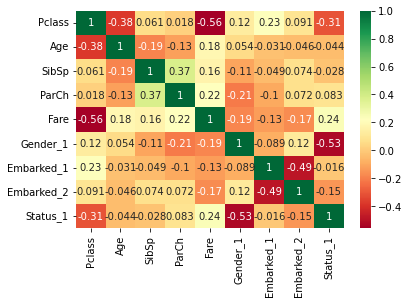

In [109]:
sns.heatmap(dataset1.corr(), annot = True, cmap = 'RdYlGn')

In [110]:
# sns.pairplot(dataset1)

In [111]:
#MULTI CO LINEARITY DOES NOT AFFECT CLASSIFICATION MODEL.

## TRAIN TEST SPLIT

In [112]:
X=dataset1.iloc[:,0:8].values
X

array([[ 1. , 29. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 1. ,  0.9,  1. , ...,  1. ,  0. ,  1. ],
       [ 1. ,  2. ,  1. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. , 26.5,  0. , ...,  1. ,  0. ,  0. ],
       [ 3. , 27. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 3. , 29. ,  0. , ...,  1. ,  0. ,  1. ]])

In [113]:
Y=dataset1.iloc[:,-1].values
Y

array([1., 1., 0., ..., 0., 0., 0.])

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=32)


## LOGISTIC REGRESSION

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [116]:
#Train Model

In [117]:
Lr=LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression()

In [118]:
#Training Accuracy 

In [119]:
Y_pred_train1=Lr.predict(X_train)

In [120]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train1)
conf_matrix

array([[476,  73],
       [103, 220]])

In [121]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train1))

Accuracy:  0.7981651376146789


In [122]:
#Test Accuracy 

In [123]:
Y_pred_test1=Lr.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test1)
conf_matrix

array([[225,  35],
       [ 55, 122]])

In [125]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test1))

Accuracy:  0.7940503432494279


In [126]:
#The model is neither under fit nor overfit.

# DECISION TREE

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
#Building Model

In [129]:
dt=DecisionTreeClassifier()

In [130]:
#Training Model

In [131]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [132]:
#Training Accuracy 

In [133]:
Y_pred_train2=dt.predict(X_train)

In [134]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train2)
conf_matrix

array([[544,   5],
       [ 23, 300]])

In [135]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train2))

Accuracy:  0.9678899082568807


In [136]:
#Test Accuracy 

In [137]:
Y_pred_test2=dt.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test2)
conf_matrix

array([[215,  45],
       [ 54, 123]])

In [139]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test2))

Accuracy:  0.7734553775743707


In [140]:
#By Using Decision Tree we are getting High Bias model. So this need to be rectified. It will be done by using 
# Random forest algorithm.

## RANDOME FOREST

In [141]:
from sklearn.ensemble import RandomForestClassifier 

In [167]:
#BUILDING MODEL

In [168]:
rf=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=32)

In [169]:
#Training Model

In [170]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32)

In [171]:
#Training Accuracy 

In [172]:
Y_pred_train3=rf.predict(X_train)

In [173]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train3)
conf_matrix

array([[541,   8],
       [ 20, 303]])

In [174]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train3))

Accuracy:  0.9678899082568807


In [175]:
#Test Accuracy 

In [176]:
Y_pred_test3=rf.predict(X_test)

In [177]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test3)
conf_matrix

array([[225,  35],
       [ 55, 122]])

In [178]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test3))

Accuracy:  0.7940503432494279
